## EPIC TENT to POC

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
err_annotations = pd.read_csv('/media/hdd/data/EpicTents/annotations/Synchronised_error_label.txt', sep=',')
err_annotations.head()

,subject_id,str_GoPro_ts,end_GoPro_ts,str_GoPro_frame,end_GoPro_frame,str_SMI_w_ts,end_SMI_w_ts,str_SMI_w_frame,end_SMI_w_frame,str_SMI_wo_ts,end_SMI_wo_ts,str_SMI_wo_frame,end_SMI_wo_frame,error_label_main,error_label_sub,action_label
0,1,00:01:06:41,00:01:34:45,3998,5680,00:06:42:21,00:07:10:23,12081,12923,00:06:41:04,00:07:09:06,9628,10302,1,-1,2
1,1,00:01:14:03,00:01:17:27,4439,4643,00:06:50:02,00:06:53:14,12302,12404,00:06:48:13,00:06:51:22,9805,9886,0,-1,2
2,1,00:01:56:53,00:02:01:10,7007,7263,00:07:32:27,00:07:37:05,13587,13715,00:07:31:09,00:07:35:15,10833,10935,1,-1,2
3,1,00:02:57:19,00:03:06:58,10629,11207,00:08:33:10,00:08:42:29,15400,15689,00:08:31:19,00:08:41:10,12283,12514,0,-1,0
4,1,00:03:13:31,00:03:15:29,11600,11718,00:08:49:16,00:08:51:15,15886,15945,00:08:47:23,00:08:49:22,12671,12718,0,-1,2


In [3]:
# mapping id -> action_label

current_task_labels={
    1: 'approach',
    2: 'assemble_support',      
    3: 'insert_stake',          
    4: 'insert_support',        
    5: 'insert_support_tab',    
    6: 'instruction',           
    7: 'pickup/open_stakebag',  
    8: 'pickup/open_supportbag',
    9: 'pickup/open_tentbag',   
    10: 'pickup/place_ventcover',
    11: 'place_guyline',         
    12: 'spread_tent',           
    13: 'tie_top' }        

with open('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/adapted_annotations/mapping.txt', 'w') as o:

    for action in current_task_labels.keys():
            o.write('{} {}\n'.format(action-1, current_task_labels[action]))

In [31]:
annotations = pd.read_csv('/media/hdd/data/EpicTents/annotations/Synchronised_action_label.txt', sep=',')
for id in range(1,30):
    anno = annotations[annotations['subject_id'] == id]

    actual_label = anno.iloc[0]['action_label']
    start = anno.iloc[0]['str_GoPro_frame']
    end = anno.iloc[0]['end_GoPro_frame']
    start_ts = anno.iloc[0]['str_GoPro_ts']
    end_ts = anno.iloc[0]['end_GoPro_ts']

    columns=['subject_id', 'str_GoPro_frame', 'end_GoPro_frame', 'str_GoPro_ts', 'end_GoPro_ts', 'action_label']
    new_df = pd.DataFrame(columns=columns)
    for row in range(1, len(anno)):
        if actual_label == anno.iloc[row]['action_label']:
            end = anno.iloc[row]['end_GoPro_frame']
            end_ts = anno.iloc[row]['end_GoPro_ts']
        else:
            new_df.loc[len(new_df)] = [id, start, end, start_ts, end_ts, actual_label]
            actual_label = anno.iloc[row]['action_label']
            start = anno.iloc[row]['str_GoPro_frame']
            end = anno.iloc[row]['end_GoPro_frame']
            start_ts = anno.iloc[row]['str_GoPro_ts']
            end_ts = anno.iloc[row]['end_GoPro_ts']
            
    new_df.loc[len(new_df)] = [id, start, end, start_ts, end_ts, actual_label]
    new_df.to_csv('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/adapted_annotations/mistake_annotations_compact/annotations_{}.csv'.format(id), sep=',', index=False)
    

In [ ]:
'train_session_set': ['annotations_8',
  'annotations_9',
  'annotations_11',
  'annotations_12',
  'annotations_13',
  'annotations_14',
  'annotations_15',
  'annotations_19',
  'annotations_21',
  'annotations_22',
  'annotations_24',
  'annotations_26',
  'annotations_27',
  'annotations_29'],

In [160]:
# mistakes annotations
import pandas as pd 

annotations = pd.read_csv('/media/hdd/data/EpicTents/annotations/Synchronised_action_label.txt', sep=',')
err_annotations = pd.read_csv('/media/hdd/data/EpicTents/annotations/Synchronised_error_label.txt', sep=',')
annotations.head()

id = 29
# anno = annotations[annotations['subject_id'] == id]
anno = pd.read_csv(f'/home/aleflabo/ego_procedural/OadTR/data/EpicTents/adapted_annotations/mistake_annotations_compact/annotations_{id}.csv')
err = err_annotations[err_annotations['subject_id'] == id]

anno_1 = anno[anno['str_GoPro_frame'] != -1][['str_GoPro_frame', 'end_GoPro_frame', 'action_label', 'str_GoPro_ts', 'end_GoPro_ts']]
err_1 = err[['str_GoPro_frame', 'end_GoPro_frame', 'error_label_main', 'action_label', 'str_GoPro_ts', 'end_GoPro_ts']]
anno_1 = anno_1.reset_index(inplace=False,drop=True)
anno_1 = anno_1.sort_values(by=['str_GoPro_frame'])
# anno_1.columns = ['start_frame', 'end_frame', 'action_label', 'start_ts', 'end_ts']
anno_1.tail(60)

,str_GoPro_frame,end_GoPro_frame,action_label,str_GoPro_ts,end_GoPro_ts
0,1501,1877,4,00:00:25:02,00:00:31:18
1,2653,3018,7,00:00:44:15,00:00:50:20
2,3020,3365,6,00:00:50:22,00:00:56:08
3,3554,4384,10,00:00:59:17,00:01:13:08
4,4648,5408,6,00:01:17:32,00:01:30:13
5,5372,7680,0,00:01:29:37,00:02:08:07
6,7952,10567,2,00:02:12:39,00:02:56:17
7,10066,10425,0,00:02:47:56,00:02:53:55
8,10589,11537,3,00:02:56:39,00:03:12:28
9,12351,19236,2,00:03:26:03,00:05:20:55


In [161]:
# slow and search (not always this one) annotations start with beginning of the action
# some errors annotations are not in the range of action annotations (?)
# correction can start in the middle
Error_annotation = {0:'motor', 1:'misuse', 2:'order', 3:'failure', 4:'omit', 5:'search', 6:'correction', 7:'slow', 8:'repeat'}
Proc_annotation = [2,6,8]

err_1[err_1['error_label_main'].isin(Proc_annotation)].sort_values(by=['str_GoPro_frame'])

,str_GoPro_frame,end_GoPro_frame,error_label_main,action_label,str_GoPro_ts,end_GoPro_ts
612,3381,3517,2,6,00:00:56:24,00:00:58:40
615,10729,10882,2,3,00:02:58:59,00:03:01:32
616,11090,11475,2,3,00:03:05:01,00:03:11:26
624,20002,20463,2,11,00:05:33:41,00:05:41:23


In [162]:
common_index = anno_1[anno_1['str_GoPro_frame'].isin(err_1[err_1['error_label_main'].isin(Proc_annotation)].sort_values(by=['str_GoPro_frame'])['str_GoPro_frame'])].index
common_st_frame = anno_1['str_GoPro_frame'][anno_1['str_GoPro_frame'].isin(err_1[err_1['error_label_main'].isin(Proc_annotation)].sort_values(by=['str_GoPro_frame'])['str_GoPro_frame'])]
mask = err_1[err_1['error_label_main'].isin(Proc_annotation)]['str_GoPro_frame'].isin(common_st_frame.values)
not_common_index = err_1[err_1['error_label_main'].isin(Proc_annotation)][~mask].index
print(common_index, not_common_index)
# common_index = list(common_index) + [20,22]
# common_index = [22,28,34,36,42,48,54,55,61,69,72,73,75,86,93]
common_index = []

Int64Index([], dtype='int64') Int64Index([612, 615, 616, 624], dtype='int64')


In [163]:
anno_1['label'] = 'correct'
anno_1['remark'] = ''
rows = common_index
for row in rows:
    anno_1['label'].iloc[row] = 'mistake'
    anno_1['remark'].iloc[row] = Error_annotation[2]
anno_1.columns = ['start_frame', 'end_frame', 'action_label', 'start_ts', 'end_ts', 'label', 'remark']
anno_1.tail(30)
# anno_1.iloc[:common_index[0]+1].to_csv('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/adapted_annotations/trimmed_mistake_annotations/annotations_{}.csv'.format(id), index=False)
anno_1.to_csv('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/adapted_annotations/mistake_annotations_compact/annotations_{}.csv'.format(id), index=False)

anno_1 #.iloc[:common_index[0]+1]

,start_frame,end_frame,action_label,start_ts,end_ts,label,remark
0,1501,1877,4,00:00:25:02,00:00:31:18,correct,
1,2653,3018,7,00:00:44:15,00:00:50:20,correct,
2,3020,3365,6,00:00:50:22,00:00:56:08,correct,
3,3554,4384,10,00:00:59:17,00:01:13:08,correct,
4,4648,5408,6,00:01:17:32,00:01:30:13,correct,
5,5372,7680,0,00:01:29:37,00:02:08:07,correct,
6,7952,10567,2,00:02:12:39,00:02:56:17,correct,
7,10066,10425,0,00:02:47:56,00:02:53:55,correct,
8,10589,11537,3,00:02:56:39,00:03:12:28,correct,
9,12351,19236,2,00:03:26:03,00:05:20:55,correct,


In [5]:
import json
with open('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/OadTR/data_info_new.json', 'r') as outfile:
    data_json = json.load(outfile)

epic = data_json['epic_tents']
epic

{'train_session_set': ['annotations_8',
  'annotations_9',
  'annotations_11',
  'annotations_12',
  'annotations_13',
  'annotations_14',
  'annotations_15',
  'annotations_19',
  'annotations_21',
  'annotations_22',
  'annotations_24',
  'annotations_26',
  'annotations_27',
  'annotations_29'],
 'test_session_set': ['annotations_1',
  'annotations_2',
  'annotations_3',
  'annotations_4',
  'annotations_5',
  'annotations_6',
  'annotations_7',
  'annotations_10',
  'annotations_16',
  'annotations_17',
  'annotations_18',
  'annotations_20',
  'annotations_23',
  'annotations_25',
  'annotations_28'],
 'class_index': ['assemble_support',
  'insert_stake',
  'insert_support',
  'insert_support_tab',
  'instruction',
  'pickup/open_stakebag',
  'pickup/open_supportbag',
  'pickup/open_tentbag',
  'pickup/place_ventcover',
  'place_guyline',
  'spread_tent',
  'tie_top']}

In [107]:
for id in range(1,30,1):
    mistake = pd.read_csv('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/adapted_annotations/trimmed_mistake_annotations/annotations_{}.csv'.format(id))

    # controllo se nelle annotazioni ci siano delle azioni overlapped (start_frame[i+1] < end_frame[i])
    for idx in mistake[mistake['end_frame'] - mistake['start_frame'].shift(-1) > 0].index:
        mistake['end_frame'].loc[idx] = mistake['start_frame'].loc[idx+1] - 50

    if id < 10:
        id_st = '0'+str(id)
    else:
        id_st = str(id)

    gt = pd.read_csv('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/annotations/frame_level_action_annotation/{}.frame_level_gt.txt'.format(id_st))
    gts = []
    for row in range(len(mistake)):
        st = mistake['start_frame'].iloc[row] - mistake['start_frame'].iloc[row]
        end = mistake['end_frame'].iloc[row] - mistake['start_frame'].iloc[row]
        gts += [str(mistake.iloc[row]['action_label'])+'\n']*(end-st)

    print(id, len(gts), mistake['end_frame'].iloc[row], len(gts) <  mistake['end_frame'].iloc[row])

    mistake.to_csv('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/adapted_annotations/trimmed_mistake_annotations/annotations_{}.csv'.format(id), index=False)
    
    with open('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/ground_truth_trimmed/annotations_{}.txt'.format(id), 'w') as o:
        for item in gts:
            o.write(item)
        
        
        

1 17280 19349 True
2 9015 14476 True
3 31114 35725 True
4 10046 11324 True
5 9874 12406 True
6 11744 14494 True
7 5157 5858 True
8 28121 38759 True
9 39734 49841 True
10 12807 17088 True
11 38152 49159 True
12 38192 51770 True
13 31301 40574 True
14 27257 34666 True
15 26237 35525 True
16 13001 16869 True
17 11734 13314 True
18 21803 25166 True
19 25246 33478 True
20 12976 18546 True
21 24570 30792 True
22 15500 19974 True
23 3702 5735 True
24 62812 86973 True
25 6971 8915 True
26 33311 46152 True
27 35485 43882 True
28 10735 14796 True
29 19194 30203 True


## EPIC TENT to OadTR

In [98]:
import pickle 
import json 
import numpy as np

In [2]:
# open txt file /home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/test_on_train/mapping_withBG_train.txt to read 
#split the line by space and subtract 1 from the first element of the list
with open('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/adapted_annotations/mapping.txt', 'r') as f:
    mapping = f.readlines()
mapping = [x.strip() for x in mapping] 
mapping = [x.split(' ') for x in mapping]
mapping = [[int(x[0]), x[1]] for x in mapping]

mapping = [' '.join((str(x[0]),x[1])) for x in mapping]

# write the mapping to a txt file
with open('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/OadTR/mapping.txt', 'w') as f:
    for item in mapping:
        f.write("%s\n" % item)
        

In [36]:
uncertainty = []
train = []
test = []

for i in range(1,8):
    test.append('annotations_'+str(i))
    
for person in range(8,30,1):
    uncertainty_temp = []
    if len(str(person)) == 1: 
        pp = '0'+str(person)
    else:    
        pp = str(person)
    vname = '/home/aleflabo/ego_procedural/OadTR/data/EpicTents/data/{}/{}.uncertainty.gopro_timecode.txt'.format(pp, pp)
    with open(vname, 'r') as f:
        
        for line in (f.readlines()):
            uncertainty_temp.append(float(line.split('\t')[2].replace('\n','')))
        uncertainty.append(1-np.median(uncertainty_temp))
    if np.median(uncertainty_temp) < 0.4:
        train.append('annotations_'+str(person))    
    else:   
        test.append('annotations_'+str(person))

train, test

(['annotations_8',
  'annotations_9',
  'annotations_11',
  'annotations_12',
  'annotations_13',
  'annotations_14',
  'annotations_15',
  'annotations_19',
  'annotations_21',
  'annotations_22',
  'annotations_24',
  'annotations_26',
  'annotations_27',
  'annotations_29'],
 ['annotations_1',
  'annotations_2',
  'annotations_3',
  'annotations_4',
  'annotations_5',
  'annotations_6',
  'annotations_7',
  'annotations_10',
  'annotations_16',
  'annotations_17',
  'annotations_18',
  'annotations_20',
  'annotations_23',
  'annotations_25',
  'annotations_28'])

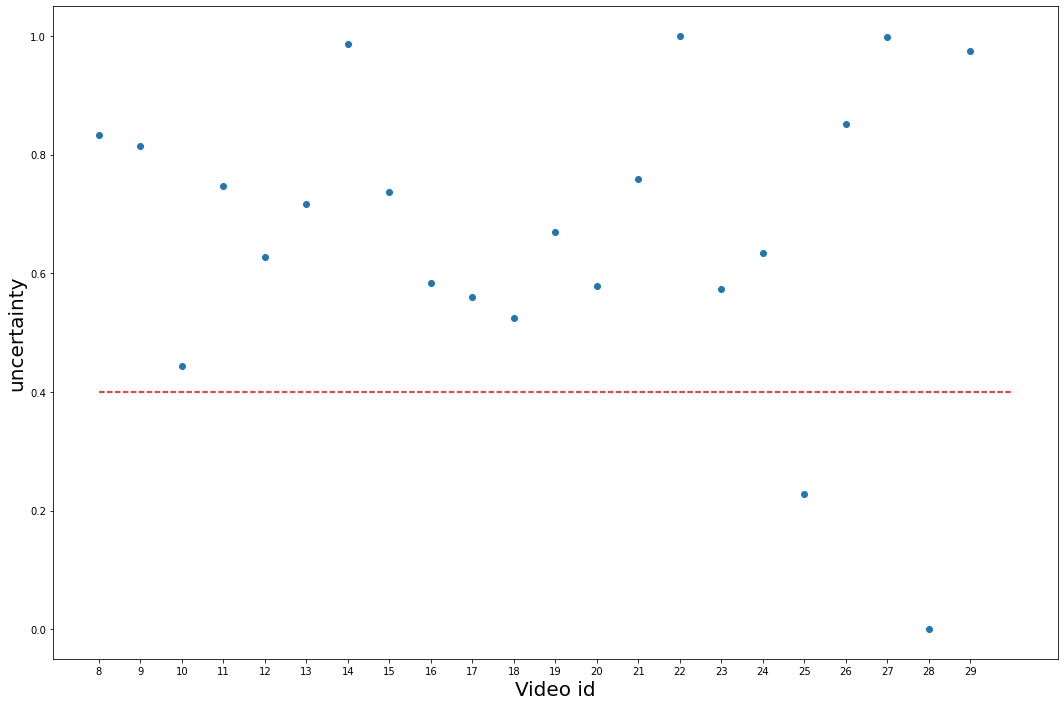

In [37]:
import matplotlib.pyplot as plt

# dimension of the plot
plt.figure(figsize=(18,12))
plt.plot(uncertainty, 'o', )
# plt.plot(uncertainty)
plt.xticks(range(len(uncertainty)), range(8,8+len(uncertainty)))
# plt.hlines(0.5, 0, len(uncertainty), colors='r', linestyles='dashed')
plt.hlines(0.4, 0, len(uncertainty), colors='r', linestyles='dashed')
plt.ylabel('uncertainty', fontsize=20)
plt.xlabel('Video id', fontsize=20)

plt.show()

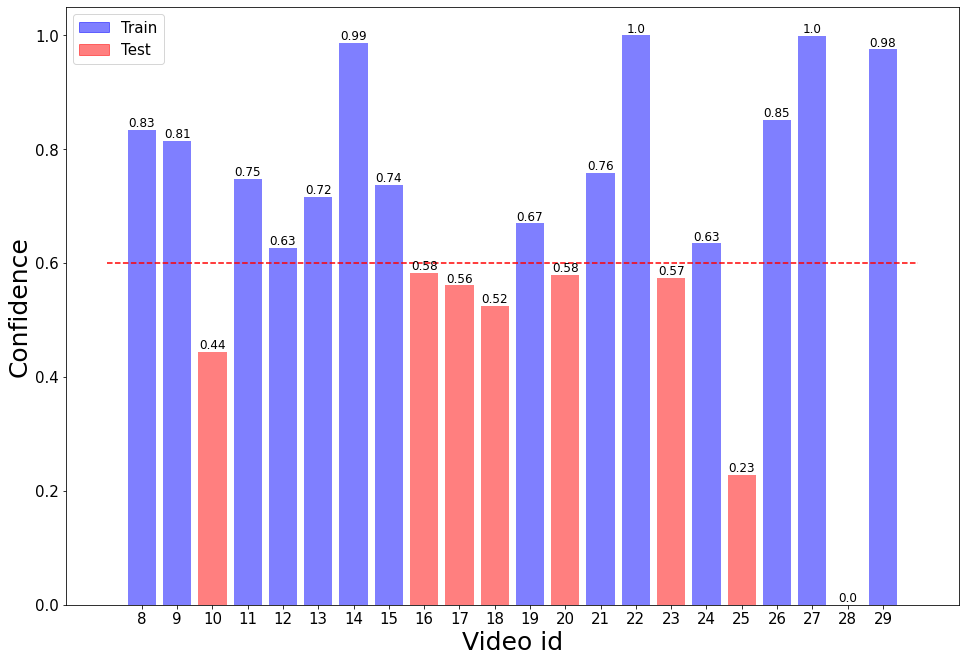

In [62]:
# barplot of the uncertainty 
plt.figure(figsize=(16,11))
# plt.bar(range(8-8,30-8), uncertainty, alpha=0.5)
# color bar plot with uncertainty values less than 0.6 in red and greater than 0.6 in blue, add legend
for i in range(len(uncertainty)):
    if uncertainty[i] < 0.6:
        plt.bar(i, uncertainty[i], color='r', alpha=0.5)
    else:
        plt.bar(i, uncertainty[i], color='b', alpha=0.5)

colors = {'Train':'b','Test':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label], alpha=0.5) for label in labels]
plt.legend(handles, labels, fontsize=15)

# add uncertainty values on top of the bars
for i in range(len(uncertainty)):
    plt.text(i, uncertainty[i], round(uncertainty[i],2), ha='center', va='bottom', fontsize=12)

# plt.xticks(range(8,30), range(8,30))
plt.xticks(range(len(uncertainty)), range(8,8+len(uncertainty)), fontsize=15)
plt.yticks(fontsize=15)

plt.hlines(0.6, -1, 22, colors='r', linestyles='dashed')
plt.ylabel('Confidence', fontsize=25)
plt.xlabel('Video id', fontsize=25)

# plt.title('Actor confidence in video annotation', fontsize=25)
# save svg file
plt.savefig('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/uncertainty_plot.svg')

plt.show()



In [6]:
def load_action_mapping(map_fname):
    label2index = dict()
    index2label = dict()
    with open(map_fname, 'r') as f:
        content = f.read().split('\n')[0:-1]
        for line in content:
            label2index[line.split()[1]] = int(line.split()[0])
            index2label[int(line.split()[0])] = line.split()[1]

    return label2index, index2label

path_to_mapping = '/home/aleflabo/ego_procedural/OadTR/data/EpicTents/OadTR/mapping.txt'
epic = {}
epic["train_session_set"] = train
epic["test_session_set"] = test
epic["class_index"] = list(load_action_mapping(path_to_mapping)[0].keys())

# read json file    
with open('/home/aleflabo/ego_procedural/OadTR/data/assembly/train/data_info_new.json', 'r') as outfile:
    data_json = json.load(outfile)

data_json['epic_tents'] = epic

# # save json file
# with open('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/OadTR/data_info_new.json', 'w') as outfile:
#     json.dump(data_json, outfile)

NameError: name 'train' is not defined

In [7]:
# read json file    
with open('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/OadTR/data_info_new.json', 'r') as outfile:
    data_json = json.load(outfile)

epic = data_json['epic_tents']

In [8]:
from glob import glob
import numpy as np
import pickle

label2index, index2label = load_action_mapping(path_to_mapping)

files = '/home/aleflabo/ego_procedural/OadTR/data/EpicTents/ground_truth/*.txt'
# files = '/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/groundTruth_frames_BG_train/*.txt'
files = glob(files)

epic['labels_train'] = {}
epic['labels_test'] = {}
epic['labels'] = {}
for fname in files:
    if fname.replace('.txt', '').split('/')[-1] in epic["train_session_set"]:
        suffix = 'train'
    else: 
        suffix = 'test'
    with open(fname) as fp:
        labels = fp.read().split('\n')[:-1]
    gt = []
    for label in labels:
        zeros = np.zeros(len(epic["class_index"]))
        
        zeros[label2index[index2label[int(label)]]] = 1
                      
        gt.append(zeros.reshape(1, -1))
    gt = np.concatenate(gt, axis=0)

    epic['labels_{}'.format(suffix)][fname.replace('.txt', '').split('/')[-1]] = {}
    epic['labels_{}'.format(suffix)][fname.replace('.txt', '').split('/')[-1]]['anno'] = gt
    epic['labels_{}'.format(suffix)][fname.replace('.txt', '').split('/')[-1]]['feature_length'] = gt.shape[0]
    
# save pickle file
with open('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/OadTR/allMistakes/epic_test_anno.pickle', 'wb') as outfile:
    pickle.dump(epic['labels_test'], outfile)
    
# save pickle file
with open('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/OadTR/allMistakes/epic_train_anno.pickle', 'wb') as outfile:
    pickle.dump(epic['labels_train'], outfile)

NameError: name 'pickle' is not defined

In [9]:
import os
from tqdm import tqdm
import numpy as np

def _load_epic_features(id):
    frame_features = []
    path = f'/home/aleflabo/ego_procedural/OadTR/data/EpicTents/TSM/features/{id}'
    prefix = '{}_frame_{:06d}.npy'
    if id.startswith('0'):
        idx = id[1:]
    else:
        idx = id
    anno = pd.read_csv(f'/home/aleflabo/ego_procedural/OadTR/data/EpicTents/adapted_annotations/mistake_annotations/annotations_{idx}.csv')
    for tuple in range(len(anno)):
        start_frame = anno['start_frame'].iloc[tuple]
        end_frame = anno['end_frame'].iloc[tuple]    
        for frame in range(start_frame, end_frame,1):
            fr = prefix.format(id, frame)
            frame_features.append(np.load(os.path.join(path, fr)))
            

    return np.array(frame_features)

In [10]:
import pandas as pd
epic['train_feats'] = {}
epic['test_feats'] = {}

split='test'
seen = []
id_format = '{:02d}'
for video in tqdm(epic["{}_session_set".format(split)]):

    id = id_format.format(int(video.split('_')[1]))

    epic['{}_feats'.format(split)][video] = {}
    epic['{}_feats'.format(split)][video]['rgb'] = {}
    epic['{}_feats'.format(split)][video]['flow'] = {}

    feats = _load_epic_features(id)

    epic['{}_feats'.format(split)][video]['rgb'] = feats
    epic['{}_feats'.format(split)][video]['flow'] = feats
    

with open('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/OadTR/allMistakes/epic_all_feature_{}_tsn_v2.pickle'.format(split), 'wb') as outfile:
    pickle.dump(epic['{}_feats'.format(split)], outfile)


 93%|█████████▎| 14/15 [05:22<00:23, 23.06s/it]


KeyboardInterrupt: 